In [3]:
import pandas as pd
import plotly.express as px

# Loading the 
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Cleaning up data, grouping it
df_clean = df.dropna(subset=['Make', 'Model'])
make_model_counts = df_clean.groupby(['Make', 'Model']).size().reset_index(name='count')

# Focusing only on top 10 makes to declutter the data
top_makes = make_model_counts.groupby('Make')['count'].sum().nlargest(10).index
filtered = make_model_counts[make_model_counts['Make'].isin(top_makes)]

# Building the treemap; color based on makes
fig = px.treemap(
    filtered,
    path=['Make', 'Model'],
    values='count',
    color='Make',  
    title='EV Make and Model Distribution in Washington (Top 10 Makes)',
    color_discrete_sequence=px.colors.qualitative.Set3  
)

fig.write_html("ev_treemap.html")


fig.show()



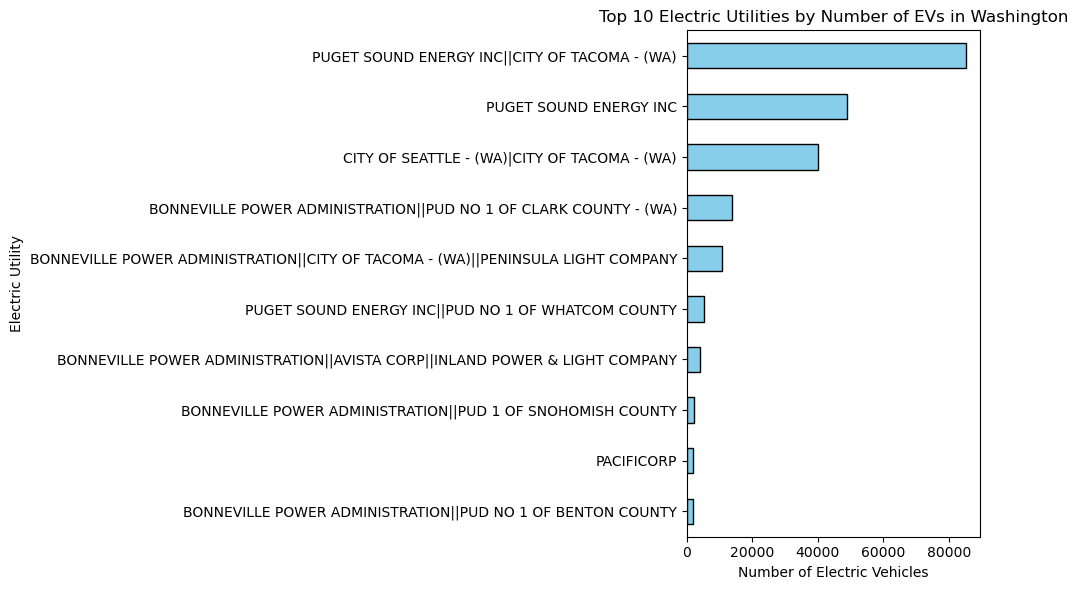

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Count number of evs per utility
utility_counts = df['Electric Utility'].value_counts().head(10)

# Plotting the barchart
plt.figure(figsize=(10, 6))
utility_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add titles and labels
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("Electric Utility")
plt.title("Top 10 Electric Utilities by Number of EVs in Washington")
plt.tight_layout()
plt.show()
